In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
Engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(Engine, reflect=True)

In [23]:
# View all of the classes that automap found
print (f"All classes: ", Base.classes.keys())

All classes:  ['measurement', 'station']


In [7]:
# Save references to each table
Measures = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
Sessions1 = Session(Engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
Recentdate = Sessions1.query(Measures.date).order_by(Measures.date.desc()).first()
print (f"Most recent date is: ", Recentdate)

Most recent date is:  ('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation = dt.date(2017,8,23) - dt.timedelta(days=365)
Plotdata = Sessions1.query(Measures.date, Measures.prcp).filter(Measures.date >= Precipitation).order_by(Measures.date).all()
PrecipitationScores = Sessions1.query(Measures.date, Measures.prcp).order_by(Measures.date.desc()).all()
PrecipitationDF = pd.DataFrame(PrecipitationScores, columns=["Date", "Precipitation"])
PrecipitationDF.set_index(PrecipitationDF['Date'], inplace=True)
PrecipitationDF.sort_index()
PrecipitationDF


,Date,Precipitation
Date,,
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.08
2017-08-23,2017-08-23,0.45
2017-08-22,2017-08-22,0.00
...,...,...
2010-01-01,2010-01-01,0.21
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.15


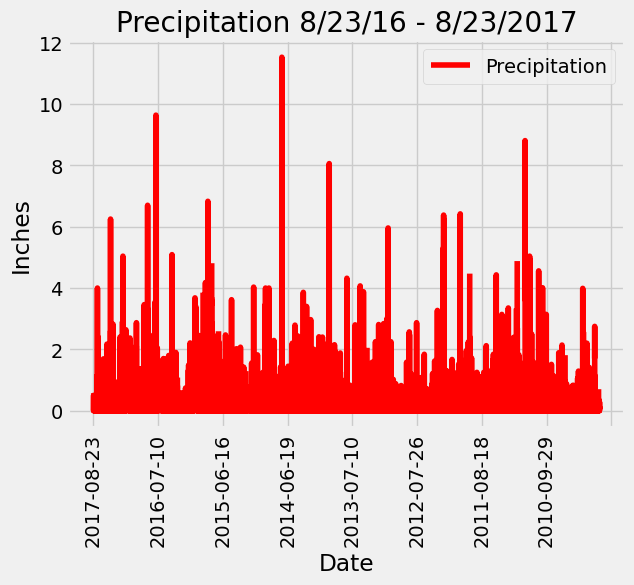

In [11]:
PrecipitationDF.plot(ylabel='Inches', xlabel='Date', color='red')
plt.xticks(rotation=90)
plt.title('Precipitation 8/23/16 - 8/23/2017')
plt.savefig("SurfsUp/Plot.png")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
PrecipitationDF.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number of stations in the dataset
Stations = Sessions1.query(Measures.station).distinct().count()
print (f"Number of Stations is:", Stations)

Number of Stations is: 9


In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ActiveStations = Sessions1.query(Measures.station, func.count(Measures.station)).group_by(Measures.station).order_by(func.count(Measures.station).desc()).all()
print (f"The most active stations are: ", ActiveStations)

The most active stations are:  [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Select = [func.min(Measures.tobs), func.max(Measures.tobs), func.avg(Measures.tobs)]
Temps = Sessions1.query(*Select).filter(Measures.station == "USC00519281").all()
print (f"The most active station IDs are: ", Temps)

The most active station IDs are:  [(54.0, 85.0, 71.66378066378067)]


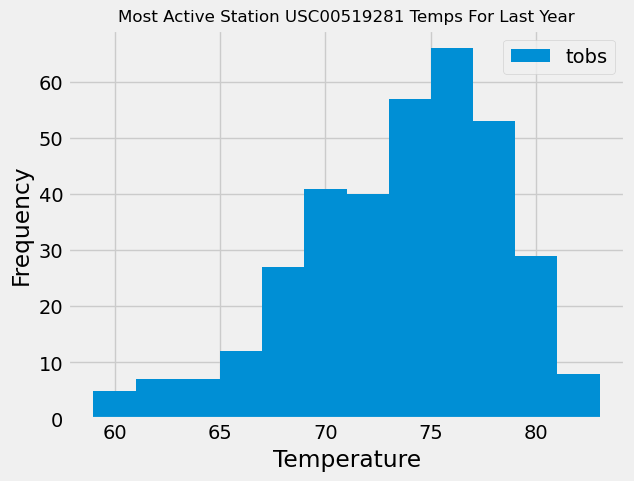

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Sessions1.query(Measures.station, func.count(Measures.tobs)).group_by(Measures.station).order_by(func.count(Measures.tobs).desc()).first()
MostActive = Sessions1.query(Measures.tobs).filter(Measures.date >= Precipitation).filter(Measures.station == 'USC00519281').all()
MostActiveDF = pd.DataFrame(MostActive, columns=["TOBS"])
MostActiveDF.plot.hist(bins=12)
plt.title('Most Active Station USC00519281 Temps For Last Year', fontsize = 12)
plt.legend(['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig("SurfsUp/Histogram.png")
plt.show()

# Close Session

In [42]:
# Close Session
Sessions1.close()